<a href="https://colab.research.google.com/github/MonitSharma/Learn-Quantum-Computing-with-Qiskit/blob/main/Classical_Computation_on_a_Quantum_Computer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit
%pip install pylatexenc
%pip install scikit-learn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.1 MB/s eta 0:00:00
  Created wheel fo

# Classical Computation on a Quantum Computer


## Introduction

The presence of a universal set of quantum gates brings forth a remarkable consequence: the ability to replicate any classical computation. The process is quite straightforward - we break down the classical computation into the familiar Boolean logic gates, as seen in previous articles and then faithfully reproduce them on a quantum computer.

Here lies a pivotal truth about quantum computers: they possess the capability to perform tasks equivalent to those of classical computers, all while maintaining at least the same level of computational complexity. While the primary goal isn't to replace classical computers in their areas of expertise, this showcases the broad versatility of quantum computing, enabling it to tackle a wide array of general problems. 🌐🔍

Moreover, problems that necessitate quantum solutions often involve components that can be effectively handled using classical algorithms. In certain instances, these classical parts can be seamlessly executed on classical hardware. However, the real magic unfolds when we encounter scenarios where the classical algorithm must operate on inputs residing in a superposition state - this demands the utilization of quantum hardware. In this section, we'll embark on an exploration of the principles and techniques employed when bridging the gap between classical algorithms and quantum hardware. 🚀🧠

So, fasten your seatbelts and get ready to witness the seamless convergence of classical and quantum computing, forging a path towards unraveling some of the most enigmatic challenges in the world of technology! 🌌💡


## Consulting an Oracle

Many quantum algorithms are based around the analysis of some function $f(x)$. Often these algorithms simply assume the existence of some 'black box' implementation of this function, which we can give an input and receive the corresponding output $f(x)$. This is referred to as an oracle.

The advantage of thinking of the oracle in this abstract way allows us to concentrate on the quantum techniques we use to analyze the function, rather than the function itself.

In order to understand how an oracle works within a quantum algorithm, we need to be specific about how they are defined. One of the main forms that oracles take is that of Boolean oracles. These are described by the following unitary evolution,

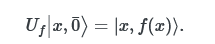

Here $|x,0⟩ = |x⟩ \otimes |0⟩$
is used to represent a multi-qubit state consisting of two registers. The first register is in $|x\rangle$ state , where $x$ is a binary representation of the input to our function. The number of qubits in this register is the number of bits required to represent the inputs.

The job of the second register is to similarly encode the output. Specifically, the state of this register after applying $U_f$
will be a binary representation of the output $|f(x)\rangle$, and this register will consist of as many qubits as are required for this. This initial state $|0⟩$
for this register represents the state for which all qubits are $|0⟩$. For other initial states, applying $U_f$
will lead to different results. The specific results that arise will depend on how we define the unitary $U_f$
.

Another form of oracle is the phase oracle, which is defined as follows,

Screenshot 2023-07-26 at 12-23-38 Classical Computation on a Quantum Computer.png


where the output $f(x)$ is typically a simple bit value of $0$ or $1$.

Though it seems much different in form from the Boolean oracle, it is very much another expression of the same basic idea. In fact, it can be realized using the same 'phase kickback' mechanism as described in a previous section.

To see this, consider the Boolean oracle $U_f$
that would correspond to the same function. This can be implemented as something that is essentially a generalized form of the controlled-NOT. It is controlled on the input register, such that it leaves the output bit in state $|0\rangle$ for $f(x) = 0$ , and applies $X$ to flip it to $|1⟩$ if $f(x) = 1$ . If the initial state of the output register were $|-\rangle$ rather than $0⟩$, the effect of $U_f$
would then be to induce exactly the phase of $(-1)^{f(x)}$required.



Screenshot 2023-07-26 at 12-26-29 Classical Computation on a Quantum Computer.png


Since the $|-\rangle$ state of the output qubit is left unchanged by the whole process, it can safely be ignored. The end effect is therefore that the phase oracle is simply implemented by the corresponding Boolean oracle.

## Taking out the Grabage


The functions evaluated by an oracle are typically those that can be evaluated efficiently on a classical computer. However, the need to implement it as a unitary in one of the forms shown above means that it must instead be implemented using quantum gates. However, this is not quite as simple as just taking the Boolean gates that can implement the classical algorithm, and replacing them with their quantum counterparts.

One issue that we must take care of is that of reversibility. A unitary of the form $U = \sum_x |f(x)⟩⟨x|$
is only possible if every unique input $x$ results in a unique output $f(x)$, which is not true in general. However, we can force it to be true by simply including a copy of the input in the output. It is this that leads us to the form for Boolean oracles as we saw earlier

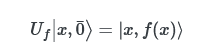

With the computation written as a unitary, we are able to consider the effect of applying it to superposition states. For example, let us take the superposition over all possible inputs (unnormalized for simplicity). This will result in a superposition of all possible input/output pairs,

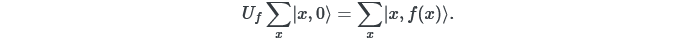

When adapting classical algorithms, we also need to take care that these superpositions behave as we need them to. Classical algorithms typically do not only compute the desired output, but will also create additional information along the way. Such additional remnants of a computation do not pose a significant problem classically, and the memory they take up can easily be recovered by deleting them. From a quantum perspective, however, things are not so easy.

For example, consider the case that a classical algorithm performs the following process,


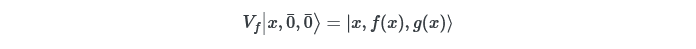

Here we see a third register, which is used as a 'scratchpad' for the classical algorithm. We will refer to information that is left in this register at the end of the computation as the 'garbage',$g(x)$ . Let us use $V_f$
to denote a unitary that implements the above.

Quantum algorithms are typically built upon interference effects. The simplest such effect is to create a superposition using some unitary, and then remove it using the inverse of that unitary. The entire effect of this is, of course, trivial. However, we must ensure that our quantum computer is at least able to do such trivial things.

For example, suppose some process within our quantum computation has given us the superposition state $\sum_x |x, f(x)⟩$
, and we are required to return this to the state $\sum_x |x, 0⟩$
. For this we could simply apply $U_f^{\dagger}$
. The ability to apply this follows directly from knowing a circuit that would apply $U_f$
, since we would simply need to replace each gate in the circuit with its inverse and reverse the order.

However, suppose we don't know how to apply $U_f$
, but instead know how to apply $V_f$
. This means that we can't apply $U_f^{\dagger}$
here, but could use $V_f^{\dagger}$
. Unfortunately, the presence of the garbage means that it won't have the same effect.

For an explicit example of this we can take a very simple case. We'll restrict $x$,$f(x)$ and $g(x)$ to all consist of just a single bit. We'll also use $f(x)=x$ and $g(x)=x$, each of which can be achieved with just a single cx gate controlled on the input register.

Specifically, the circuit to implement $U_f$
is just the following single cx between the single bit of the input and output registers.

In [2]:
from qiskit import QuantumCircuit, QuantumRegister

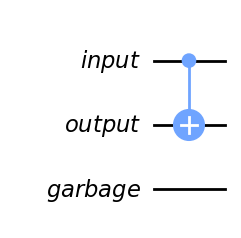

In [3]:
input_bit = QuantumRegister(1, 'input')
output_bit = QuantumRegister(1, 'output')
garbage_bit = QuantumRegister(1, 'garbage')

Uf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Uf.cx(input_bit[0], output_bit[0])

Uf.draw('mpl')

For $V_f$
, where we also need to make a copy of the input for the garbage, we can use the following two cx gates.

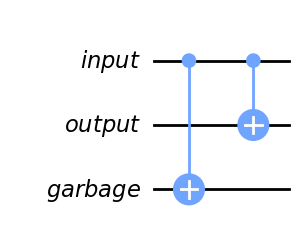

In [4]:
Vf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(input_bit[0], output_bit[0])
Vf.draw('mpl')

Now we can look at the effect of first applying $U_f$
, and then applying $V_f^{\dagger}$
. The net effect is the following circuit.

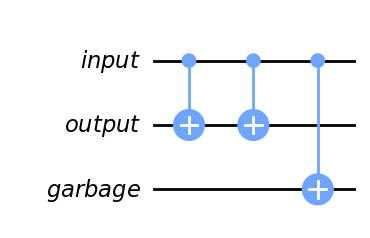

In [5]:
qc = Uf.compose(Vf.inverse())
qc.draw('mpl')

This circuit begins with two identical cx gates, whose effects cancel each other out. All that remains is the final cx between the input and garbage registers. Mathematically, this means


Screenshot 2023-07-26 at 12-33-56 Classical Computation on a Quantum Computer.png

Here we see that the action of $V_f^{\dagger}$
does not simply return us to the initial state, but instead leaves the first qubit entangled with unwanted garbage. Any subsequent steps in an algorithm will therefore not run as expected, since the state is not the one that we need.

For this reason we need a way of removing classical garbage from our quantum algorithms. This can be done by a method known as 'uncomputation'. We simply need to take another blank variable and apply $V_f$



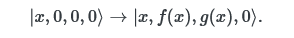


Then we apply a set of controlled-NOT gates, each controlled on one of the qubits used to encode the output, and targeted on the corresponding qubit in the extra blank variable.

Here's the circuit to do this for our example using single qubit registers.

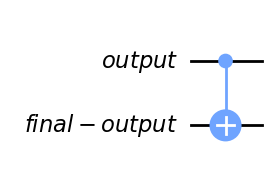

In [6]:
final_output_bit = QuantumRegister(1, 'final-output')

copy = QuantumCircuit(output_bit, final_output_bit)
copy.cx(output_bit, final_output_bit)

copy.draw('mpl')

The effect of this is to copy the information over (if you have heard of the no-cloning theorem, note that this is not the same process). Specifically, it transforms the state in the following way.

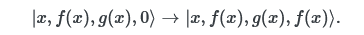

Finally we apply $V_f^{\dagger}$
, which undoes the original computation.

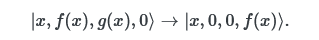


The copied output nevertheless remains. The net effect is to perform the computation without garbage, and hence achieves our desired $U_f$
.

For our example using single qubit registers, and for which $f(x)=x$, the whole process corresponds to the following circuit.

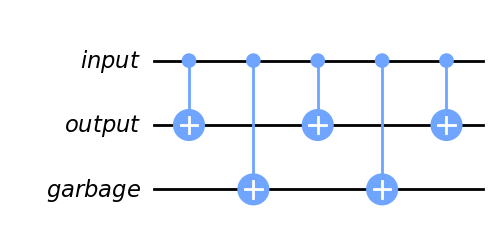

In [7]:
(Vf.inverse().compose(copy).compose(Vf)).draw('mpl')

Using what you know so far of how the cx gates work, you should be able to see that the two applied to the garbage register will cancel each other out. We have therefore successfully removed the garbage.

With this method, and all of the others covered in this chapter, we now have all the tools we need to create quantum algorithms. Now we can move on to seeing those algorithms in action.